In [8]:
# Load the uploaded CSV file to inspect the data structure and identify potential issues

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'monatszahlen2405_verkehrsunfaelle_export_31_05_24_r.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the data
data_info = data.info()
data_head = data.head()
data_unique_months = data['MONAT'].unique()  # Check unique values in 'MONAT' column

data_info, data_head, data_unique_months


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      2254 non-null   object 
 1   AUSPRAEGUNG                     2254 non-null   object 
 2   JAHR                            2254 non-null   int64  
 3   MONAT                           2254 non-null   object 
 4   WERT                            2086 non-null   float64
 5   VORJAHRESWERT                   2086 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1924 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  2001 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1932 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 158.6+ KB


(None,
        MONATSZAHL AUSPRAEGUNG  JAHR   MONAT  WERT  VORJAHRESWERT  \
 0  Alkoholunfälle   insgesamt  2024  202401   NaN            NaN   
 1  Alkoholunfälle   insgesamt  2024  202402   NaN            NaN   
 2  Alkoholunfälle   insgesamt  2024  202403   NaN            NaN   
 3  Alkoholunfälle   insgesamt  2024  202404   NaN            NaN   
 4  Alkoholunfälle   insgesamt  2024  202405   NaN            NaN   
 
    VERAEND_VORMONAT_PROZENT  VERAEND_VORJAHRESMONAT_PROZENT  \
 0                       NaN                             NaN   
 1                       NaN                             NaN   
 2                       NaN                             NaN   
 3                       NaN                             NaN   
 4                       NaN                             NaN   
 
    ZWOELF_MONATE_MITTELWERT  
 0                       NaN  
 1                       NaN  
 2                       NaN  
 3                       NaN  
 4                       NaN  ,
 arr

In [9]:
# Extracting year and month correctly from 'MONAT' and creating a new 'Date' column
data['Year'] = data['MONAT'].str[:4]  # Extract year from the first four characters
data['Month'] = data['MONAT'].str[4:]  # Extract month from the remaining characters

# Convert 'Year' and 'Month' to datetime
data['Date'] = pd.to_datetime(data['Year'] + '-' + data['Month'], format='%Y-%m', errors='coerce')

# Check for any invalid dates
invalid_dates = data[data['Date'].isna()]  # Identify any rows that couldn't be converted

# Display head of the corrected data and invalid dates if any
data_corrected_head = data.head()
invalid_dates_count = invalid_dates.shape[0]

data_corrected_head, invalid_dates_count, invalid_dates.head()  # Display results


(       MONATSZAHL AUSPRAEGUNG  JAHR   MONAT  WERT  VORJAHRESWERT  \
 0  Alkoholunfälle   insgesamt  2024  202401   NaN            NaN   
 1  Alkoholunfälle   insgesamt  2024  202402   NaN            NaN   
 2  Alkoholunfälle   insgesamt  2024  202403   NaN            NaN   
 3  Alkoholunfälle   insgesamt  2024  202404   NaN            NaN   
 4  Alkoholunfälle   insgesamt  2024  202405   NaN            NaN   
 
    VERAEND_VORMONAT_PROZENT  VERAEND_VORJAHRESMONAT_PROZENT  \
 0                       NaN                             NaN   
 1                       NaN                             NaN   
 2                       NaN                             NaN   
 3                       NaN                             NaN   
 4                       NaN                             NaN   
 
    ZWOELF_MONATE_MITTELWERT  Year Month       Date  
 0                       NaN  2024    01 2024-01-01  
 1                       NaN  2024    02 2024-02-01  
 2                       NaN  2024  

In [10]:
# Filter out rows with invalid 'Date' values (those where conversion to datetime failed)
cleaned_data = data[data['Date'].notna()]

# Verify the data cleaning step
cleaned_data_head = cleaned_data.head()
cleaned_data_summary = cleaned_data.describe()

# Display the cleaned data and summary statistics
cleaned_data_head, cleaned_data_summary


(       MONATSZAHL AUSPRAEGUNG  JAHR   MONAT  WERT  VORJAHRESWERT  \
 0  Alkoholunfälle   insgesamt  2024  202401   NaN            NaN   
 1  Alkoholunfälle   insgesamt  2024  202402   NaN            NaN   
 2  Alkoholunfälle   insgesamt  2024  202403   NaN            NaN   
 3  Alkoholunfälle   insgesamt  2024  202404   NaN            NaN   
 4  Alkoholunfälle   insgesamt  2024  202405   NaN            NaN   
 
    VERAEND_VORMONAT_PROZENT  VERAEND_VORJAHRESMONAT_PROZENT  \
 0                       NaN                             NaN   
 1                       NaN                             NaN   
 2                       NaN                             NaN   
 3                       NaN                             NaN   
 4                       NaN                             NaN   
 
    ZWOELF_MONATE_MITTELWERT  Year Month       Date  
 0                       NaN  2024    01 2024-01-01  
 1                       NaN  2024    02 2024-02-01  
 2                       NaN  2024  

/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


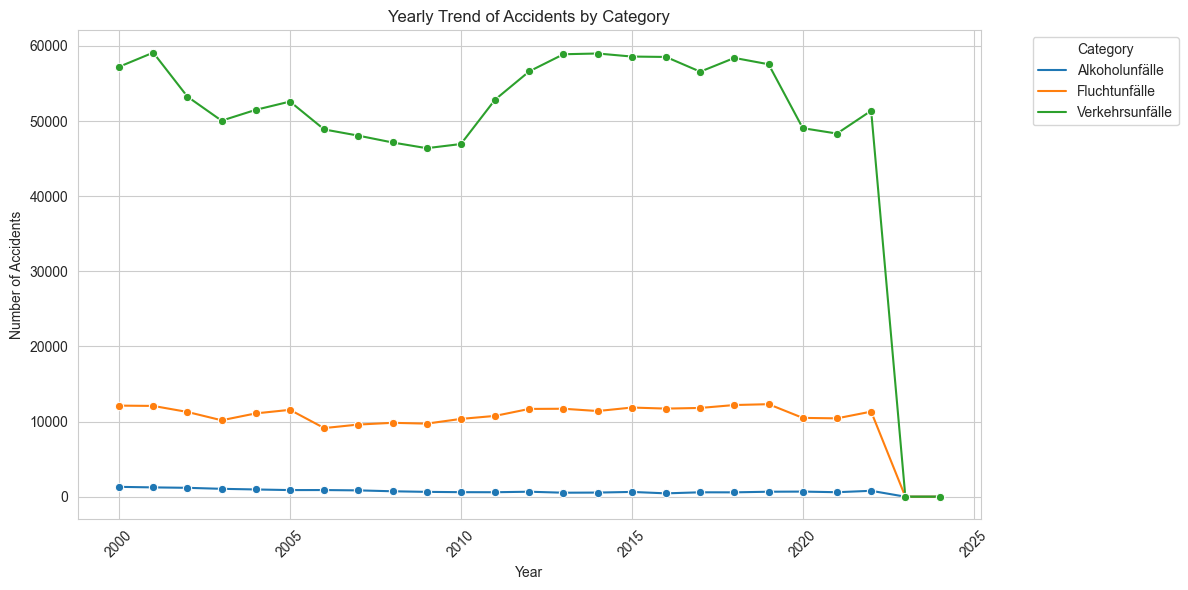

/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


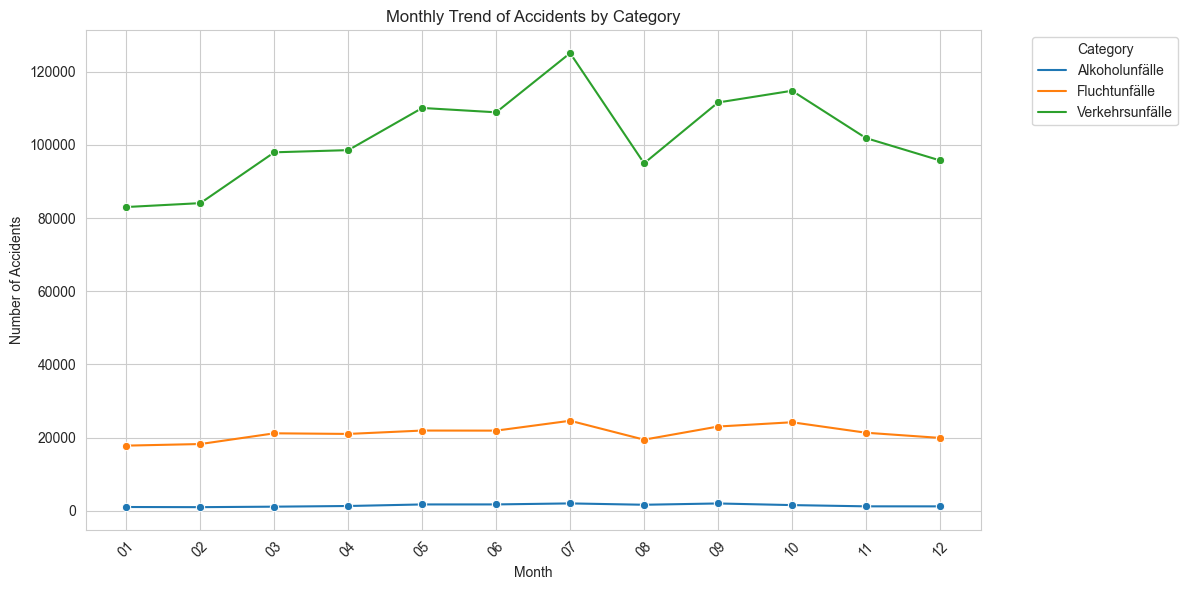

In [11]:
# Setting up the figure aesthetics
sns.set_style("whitegrid")

# Group data by year for accident counts by category
yearly_counts = cleaned_data.groupby(['JAHR', 'MONATSZAHL'])['WERT'].sum().reset_index()

# Plot yearly trends of accidents by category
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_counts, x='JAHR', y='WERT', hue='MONATSZAHL', marker='o')
plt.title('Yearly Trend of Accidents by Category')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Group data by month for accident counts by category
monthly_counts = cleaned_data.groupby(['Month', 'MONATSZAHL'])['WERT'].sum().reset_index()

# Plot monthly trends of accidents by category
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x='Month', y='WERT', hue='MONATSZAHL', marker='o')
plt.title('Monthly Trend of Accidents by Category')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()